In [10]:
#Analytics
#understand the data
#to find some information from the given dataset which can used to take a decision
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
df = pd.read_csv('train.csv')

In [11]:
df.shape

(891, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#total number of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#we will come later to handle missing values

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#Exploratory Data Analysis
#univariate - analysis of one column at a time
#bivariate -  analysis of 2 columns at a time
#multivariate - analysis of more than 2 columns at a time

In [20]:
#univariate

In [24]:
len(np.unique(df['PassengerId']))
#there were around 891 unique passengers travelling on the Titanic which is available in the given dataset

891

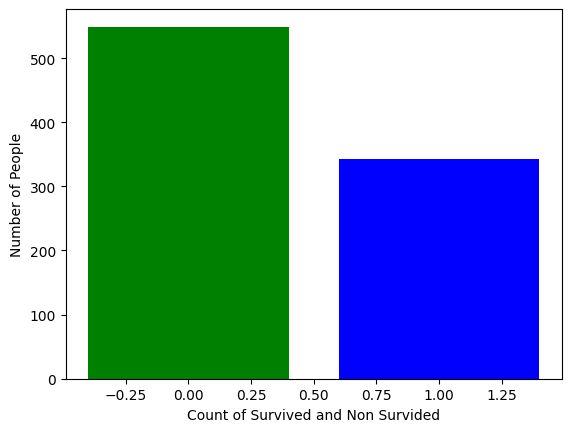

In [33]:
data_sur = df['Survived'].value_counts()
plt.bar(data_sur.index,data_sur.values,color=['green','blue'])
plt.xlabel("Count of Survived and Non Survided")
plt.ylabel("Number of People")
plt.show()

#We got to know, there were less number of people got survived

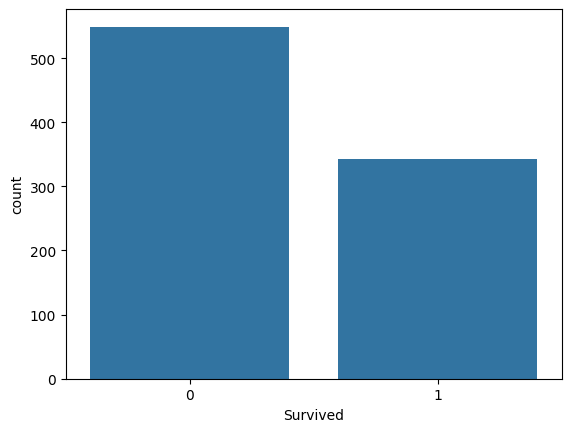

In [36]:
sns.countplot(x = df['Survived'])
plt.show()
#We got to know, there were less number of people got survived

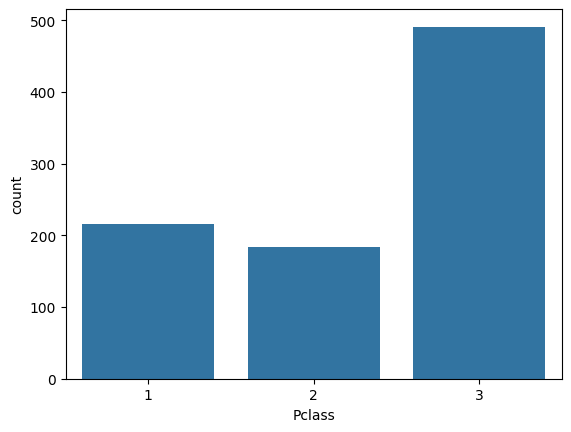

In [41]:
sns.countplot(x=df['Pclass'])
plt.show()

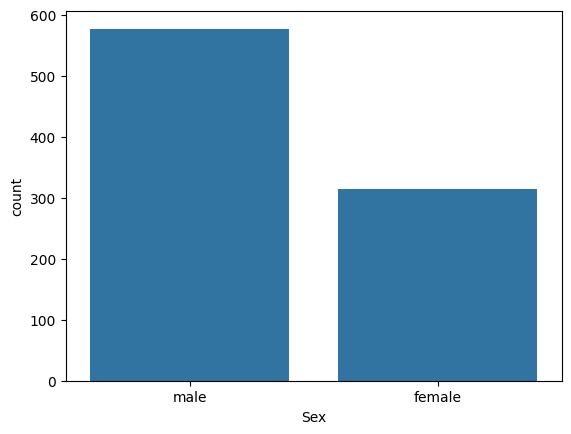

In [44]:
sns.countplot(x=df['Sex'])
plt.show()
#We got to know there were more males as compare to females on the titanic

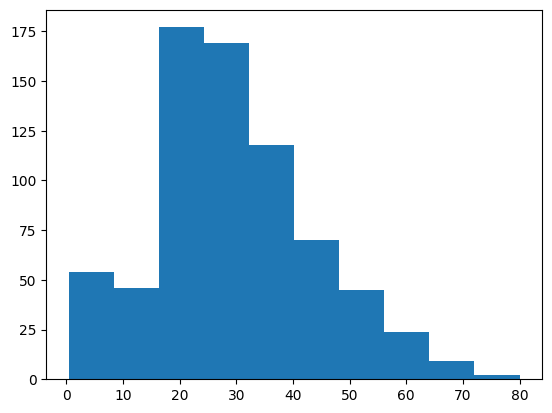

In [47]:
plt.hist(df['Age'])
plt.show()

<ipython-input-48-81f52f5404c1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


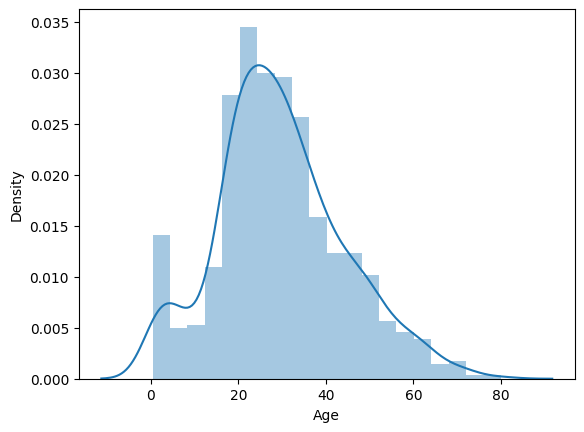

In [48]:
#or
sns.distplot(df['Age'])
plt.show()

In [49]:
#skewness
#measure of shape # continuous data
#skewness = 0 (symmetrical, left/right equal, mean=median=mode)
#skewness >0 (non symmetrical, long right tail,mean>median>mode)
#skewness <0 (non symmetrical,long left tail, mode>median>mean)

# 1 2 3 4 5(symmetrical)
#mean = 3
#median = 3

# 1 2 3 4 5 100(non symmetrical)
#mean = 19.16
#median = 3.5(median will give right information)

In [52]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

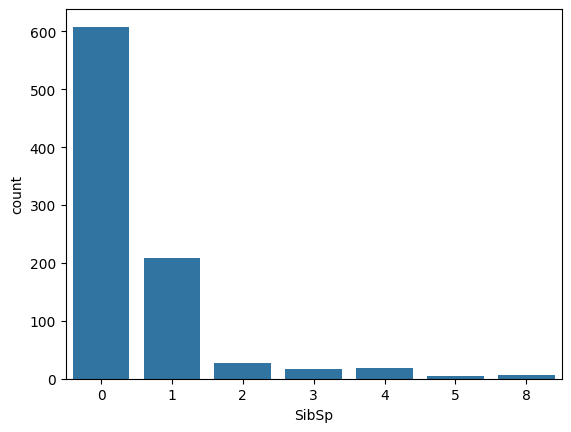

In [56]:
sns.countplot(x = df['SibSp'])
plt.show()

In [58]:
(600/891)*100
#around 67% of people travelling with no siblings

67.34006734006735

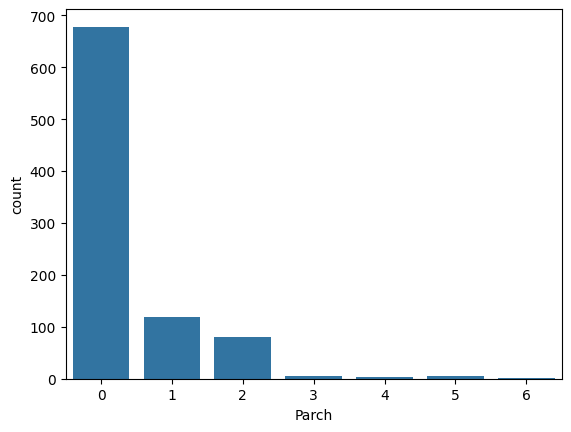

In [60]:
sns.countplot(x=df['Parch'])
plt.show()

In [61]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [62]:
(678/891)*100

76.0942760942761

In [65]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [67]:
(687/891)*100
#whenever in a column we have approx more than 50% of the data is missing then we drop a column

77.10437710437711

In [68]:
df.drop('Cabin',axis=1,inplace=True)

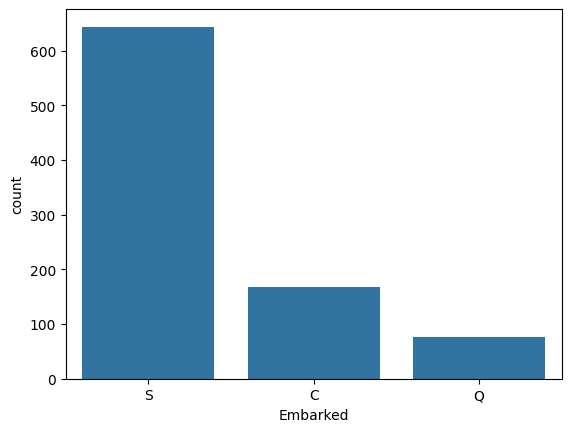

In [70]:
sns.countplot(x= df['Embarked'])
plt.show()

In [72]:
#bivariate analysis
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [75]:
df.groupby('Pclass')['Age'].median()

Pclass
1    35.0
2    28.0
3    28.0
Name: Age, dtype: float64

In [76]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [ ]:
#analysis - > analytics